# Load Libraries

In [1]:
library(dplyr)
library(caret)
library(lattice)
library(ggplot2)
library(stats)
library(Hmisc)
library(car)
library(leaps)
library(outliers)
library(kknn)
library(knitr)
library(psych)
library(corrplot)
library(tidyverse)
library(cli)
library(devtools)
library(rpart)
library(pROC)
library(nnet)
library(foreign)
library(reshape2)
library(lattice)
library(ggplot2)
library(comprehenr)
library(gridExtra)
library(MASS)
library(aod)
library(e1071)
#library(factoextra)
#conda install -c conda-forge r-factoextra 
library(class)
library(randomForest)
library(rpart)
library(rpart.plot)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: survival

Attaching package: ‘survival’

The following object is masked from ‘package:caret’:

    cluster

Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:dplyr’:

    src, summarize

The following objects are masked from ‘package:base’:

    format.pval, units

Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    recode


Attaching package: ‘kknn’

The following object is masked from ‘package:caret’:

    contr.dummy


Attaching packa

# Load Data

In [2]:
#setwd("~/Downloads/Datasets/7406/Project")

white <- read.csv(file = "winequality_white.csv", head = TRUE, sep=";")
red <- read.csv(file = "winequality_red.csv", head = TRUE, sep=";")

In [3]:
#wine <- rbind(white, red)
wine <- red


# Exploratory Data Analysis

In [4]:
head(wine, 3)
str(wine)
summary(wine)

nobs <- nrow(wine)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5


'data.frame':	1599 obs. of  12 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...


 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

In [5]:
dim(white)

[1] 4898   12

In [6]:
dim(red)

[1] 1599   12

In [7]:
summary(wine)

 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

In [8]:
na_count <- sapply(wine, function(y) sum(length(which(is.na(y)))))
na_count

fixed.acidity     volatile.acidity          citric.acid 
                   0                    0                    0 
      residual.sugar            chlorides  free.sulfur.dioxide 
                   0                    0                    0 
total.sulfur.dioxide              density                   pH 
                   0                    0                    0 
           sulphates              alcohol              quality 
                   0                    0                    0

# OUTLIERS

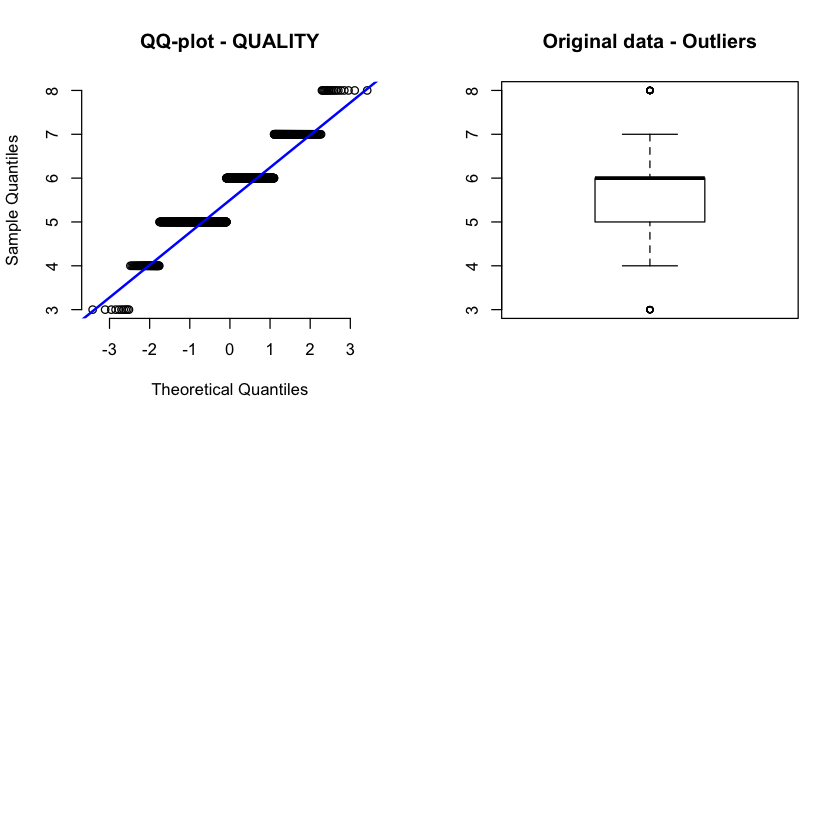

In [9]:
par(mfrow = c(2,2))
qqnorm(wine$quality, pch = 1, frame = FALSE, main = 'QQ-plot - QUALITY')
qqline(wine$quality, col = "blue", lwd = 2)
boxplot(wine$quality, main = 'Original data - Outliers')


In [10]:
grubbs.test(wine$quality, type =10)


	Grubbs test for one outlier

data:  wine$quality
G = 3.26414, U = 0.99333, p-value = 0.8626
alternative hypothesis: lowest value 3 is an outlier


Our dataset does not have any missing values. 

Our response variable "Quality" is a categorical one with the ranks from 1 to 10.
The range of values (min/max) across the variables does not require scaling or normalization. All predictors are numerical.


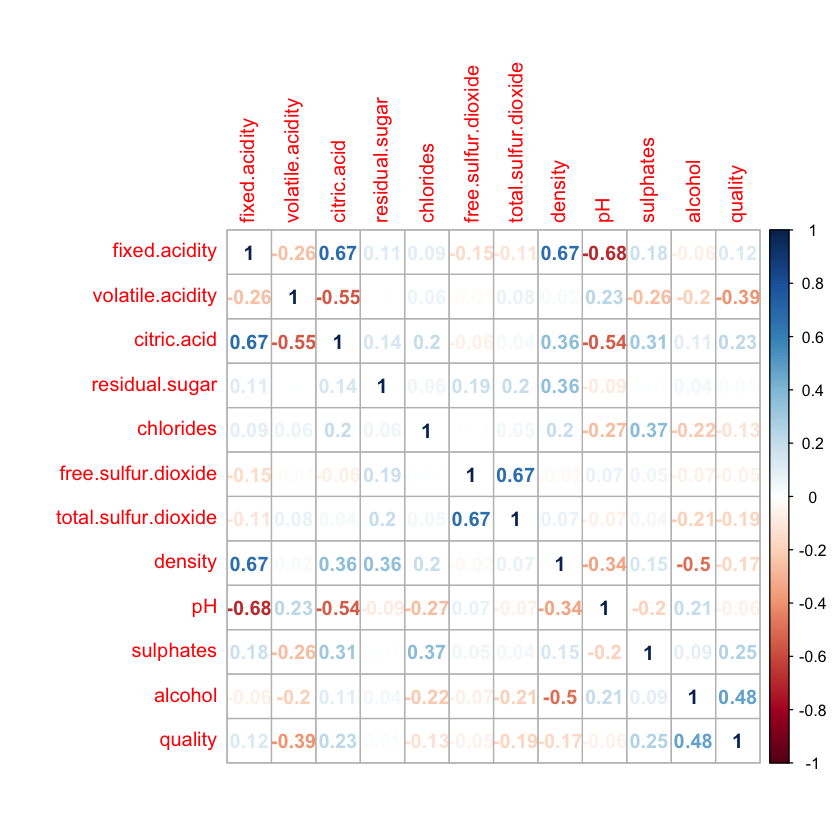

In [11]:
corrplot(cor(wine[1:(length(wine))]), method="number")

Covariance Matrix

There is some significant multicollineraity between several variables:

density - alcohol
total.sulfur.dioxide - free.sulfur.dioxide
density - residual.sugar
residual.sugar - total.sulfur.dioxide
density - fixed.acidity

Certain predictors will have to be removed. Most likely candidates are:

free.sulfur.dioxide
residual.sugar
fixed.acidity
alcohol


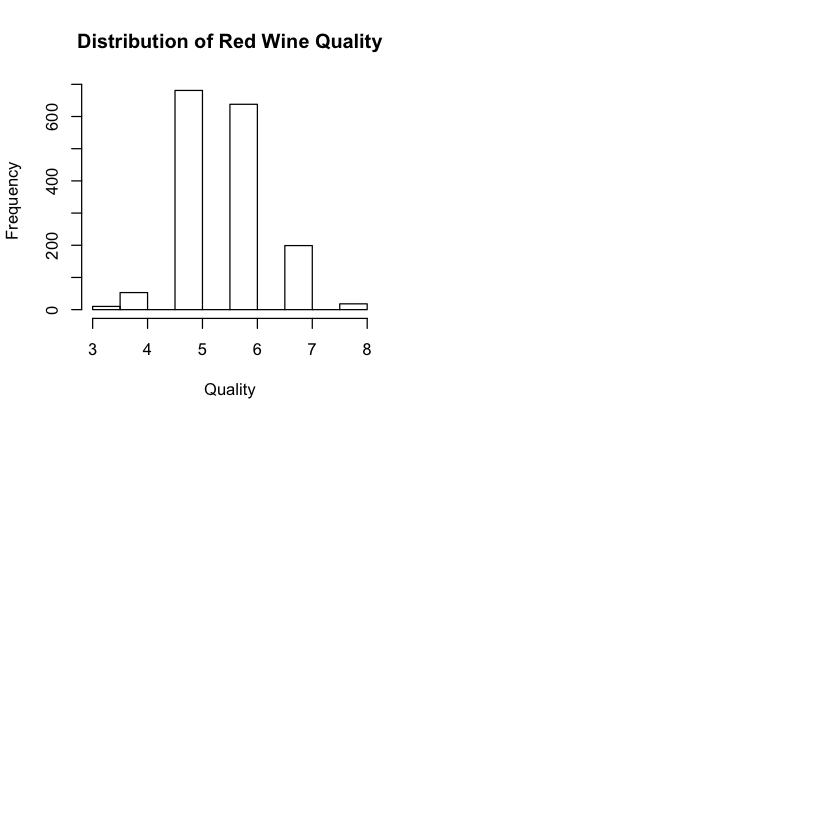

In [12]:
par(mfrow = c(2,2))

hist(wine$quality,xlab = 'Quality', main = "Distribution of Red Wine Quality")
#hist(wine[wine$type == "white",]$quality,xlab = 'Quality', main = "Distribution of White Wine Quality")
#hist(wine[wine$type == "red",]$quality,xlab = 'Quality', main = "Distribution of Red Wine Quality")

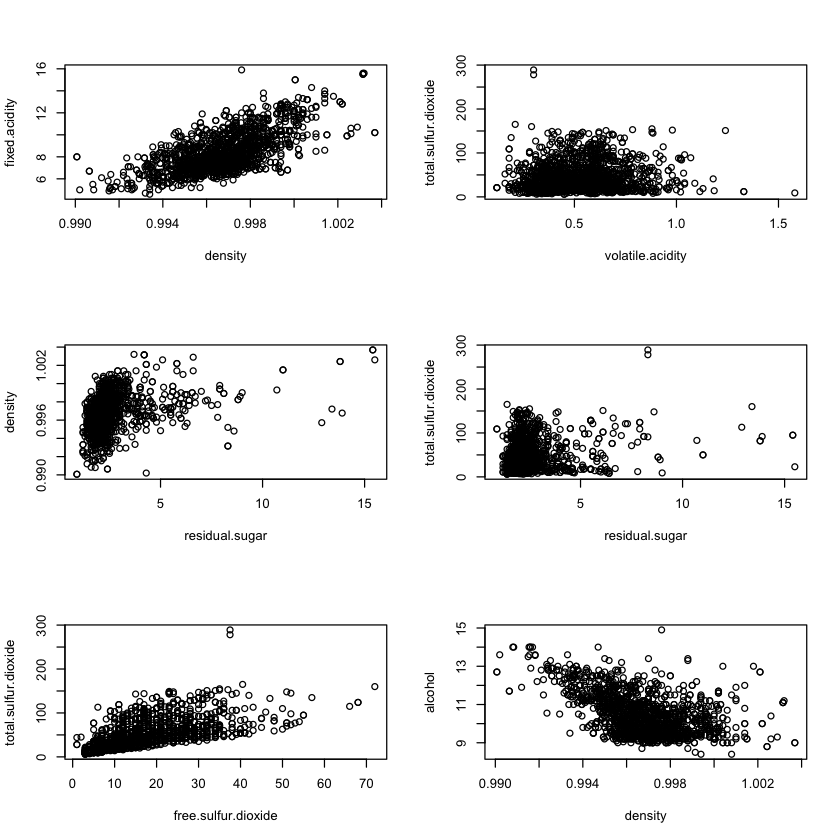

In [13]:
attach(wine)
par(mfrow = c(3,2))

plot(density, fixed.acidity)
plot(volatile.acidity, total.sulfur.dioxide)
plot(residual.sugar, density)
plot(residual.sugar, total.sulfur.dioxide)
plot(free.sulfur.dioxide, total.sulfur.dioxide)
plot(density, alcohol)

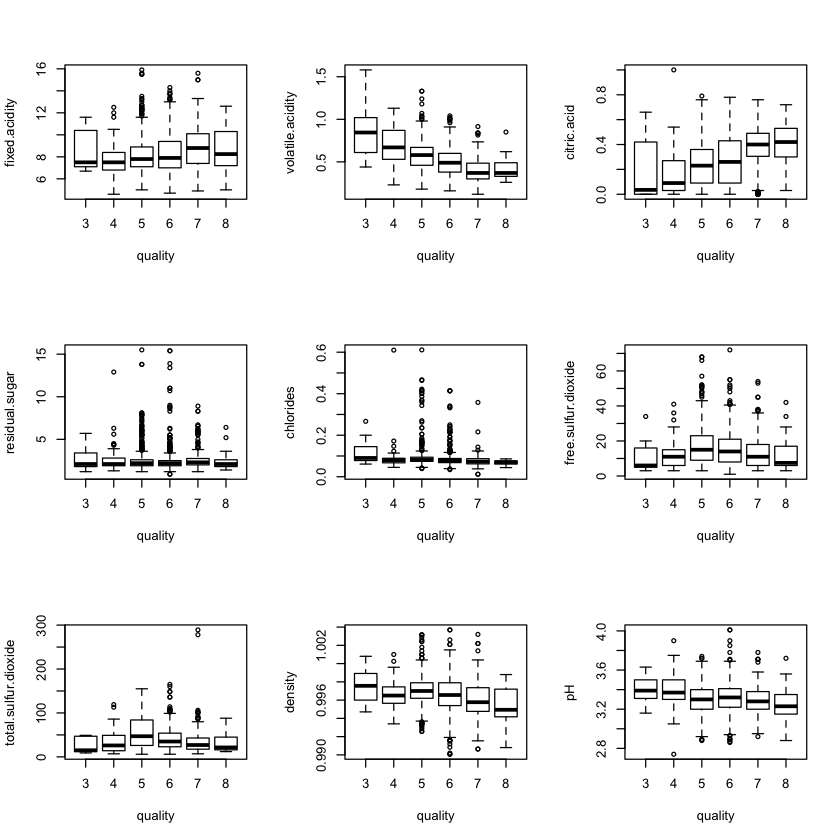

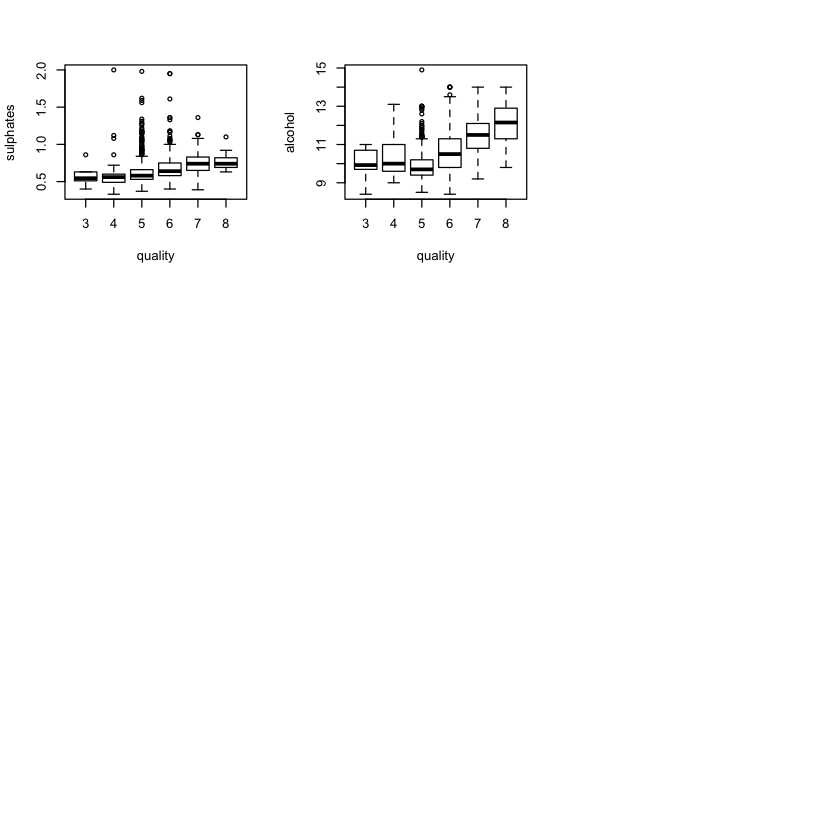

In [14]:
par(mfrow = c(3,3))
boxplot(fixed.acidity ~ quality)
boxplot(volatile.acidity ~ quality)
boxplot(citric.acid ~ quality)
boxplot(residual.sugar ~ quality)
boxplot(chlorides ~ quality)
boxplot(free.sulfur.dioxide ~ quality)
boxplot(total.sulfur.dioxide ~ quality)
boxplot(density ~ quality)
boxplot(pH ~ quality)
boxplot(sulphates ~ quality)
boxplot(alcohol ~ quality)

MODELING

We will start with converting scale values for "quality" from 1-10 to a binary system (0,1). A 1 will represent good wine and a 0 will represent "bad" wine.
We will analyze initial dataset using ordinal logistic regression at the end of this research.

At first, we will use logistic regression, KNN, SVM, Trees etc..

For Logistic regression, we romoved the following non-significant predictors:

density
fixed.acidity
residual.sugar

This is well-aligned with the conclusions from the covariance matrix


In [15]:
wine.pr <- wine[1:11]

#wine <- read.csv(file = "winequality_red.csv", head = TRUE, sep=";")
wine$quality <- ifelse(wine$quality>= 6, 1,0)
wine$quality <- as.factor(wine$quality)

summary(wine)

 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

# Logistic Regression

### Logistic Regression with All Predictors

In [16]:
lgall <- glm(quality ~ ., data = wine, family = binomial(link="logit"))
summary(lgall)


Call:
glm(formula = quality ~ ., family = binomial(link = "logit"), 
    data = wine)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4025  -0.8387   0.3105   0.8300   2.3142  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           42.949948  79.473979   0.540  0.58890    
fixed.acidity          0.135980   0.098483   1.381  0.16736    
volatile.acidity      -3.281694   0.488214  -6.722 1.79e-11 ***
citric.acid           -1.274347   0.562730  -2.265  0.02354 *  
residual.sugar         0.055326   0.053770   1.029  0.30351    
chlorides             -3.915713   1.569298  -2.495  0.01259 *  
free.sulfur.dioxide    0.022220   0.008236   2.698  0.00698 ** 
total.sulfur.dioxide  -0.016394   0.002882  -5.688 1.29e-08 ***
density              -50.932385  81.148745  -0.628  0.53024    
pH                    -0.380608   0.720203  -0.528  0.59717    
sulphates              2.795107   0.452184   6.181 6.36e-10 ***
alcohol         

In [17]:
wald.test(Sigma = vcov(lgall), b = coef(lgall), Terms = 1:length(lgall$coef))

Wald test:
----------

Chi-squared test:
X2 = 356.5, df = 12, P(> X2) = 0.0

Since p-value = 0.0, then there are no non-significant coefficients.

In [18]:
aiclgall <- round(AIC(lgall),1)
biclgall <- round(BIC(lgall),1)

print(paste('AIC = ', aiclgall, '     BIC = ', biclgall))

[1] "AIC =  1679.6      BIC =  1744.2"


In [19]:
print('Significance Ranking')
round(vif(lgall),3)

[1] "Significance Ranking"


fixed.acidity     volatile.acidity          citric.acid 
               7.969                1.777                3.280 
      residual.sugar            chlorides  free.sulfur.dioxide 
               1.721                1.576                2.015 
total.sulfur.dioxide              density                   pH 
               2.191                5.768                3.439 
           sulphates              alcohol 
               1.482                2.290

In [20]:
# Confidence Intervals

exp(cbind(OR = coef(lgall), confint(lgall)))

Waiting for profiling to be done...


,OR,2.5 %,97.5 %
(Intercept),4.497027e+18,9.875179e-50,2.611259e+86
fixed.acidity,1.145659e+00,9.453487e-01,1.391245e+00
volatile.acidity,3.756458e-02,1.417753e-02,9.623115e-02
citric.acid,2.796134e-01,9.208797e-02,8.372148e-01
residual.sugar,1.056885e+00,9.505294e-01,1.174768e+00
chlorides,1.992634e-02,8.561776e-04,4.097313e-01
free.sulfur.dioxide,1.022469e+00,1.006133e+00,1.039179e+00
total.sulfur.dioxide,9.837397e-01,9.780924e-01,9.892261e-01
density,7.591825e-23,4.731209e-92,8.931309e+46
pH,6.834461e-01,1.670776e-01,2.818561e+00


In [21]:
#print('Error')
prediction <- predict(lgall,wine[,1:11], type = "response")
prediction <- ifelse(prediction>= .5, 1,0)

In [22]:
cm <- confusionMatrix(wine$quality, as.factor(prediction))
print(cm)

print(paste('Accuracy = ', round(cm$overall['Accuracy'],3) ))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 549 195
         1 214 641
                                          
               Accuracy : 0.7442          
                 95% CI : (0.7221, 0.7654)
    No Information Rate : 0.5228          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.4868          
                                          
 Mcnemar's Test P-Value : 0.3734          
                                          
            Sensitivity : 0.7195          
            Specificity : 0.7667          
         Pos Pred Value : 0.7379          
         Neg Pred Value : 0.7497          
             Prevalence : 0.4772          
         Detection Rate : 0.3433          
   Detection Prevalence : 0.4653          
      Balanced Accuracy : 0.7431          
                                          
       'Positive' Class : 0               
                              

### Logistic Regression with Significant Predictors

In [23]:
lgsig <- glm(quality ~ .- residual.sugar - fixed.acidity, data = wine, family = binomial(link="logit"))
summary(lgsig)


Call:
glm(formula = quality ~ . - residual.sugar - fixed.acidity, family = binomial(link = "logit"), 
    data = wine)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2393  -0.8473   0.3208   0.8383   2.3577  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -51.913625  45.716779  -1.136  0.25615    
volatile.acidity      -3.257146   0.486636  -6.693 2.18e-11 ***
citric.acid           -1.029941   0.523414  -1.968  0.04910 *  
chlorides             -4.370416   1.512874  -2.889  0.00387 ** 
free.sulfur.dioxide    0.023868   0.008166   2.923  0.00347 ** 
total.sulfur.dioxide  -0.017088   0.002770  -6.169 6.88e-10 ***
density               47.107532  45.526253   1.035  0.30079    
pH                    -1.114869   0.487760  -2.286  0.02227 *  
sulphates              2.670811   0.442320   6.038 1.56e-09 ***
alcohol                0.952286   0.086081  11.063  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’

In [24]:
wald.test(Sigma = vcov(lgsig), b = coef(lgsig), Terms = 1:length(lgsig$coef))

Wald test:
----------

Chi-squared test:
X2 = 355.7, df = 10, P(> X2) = 0.0

In [25]:
aiclgsig <- round(AIC(lgsig),1)
biclgsig <- round(BIC(lgsig),1)

print(paste('AIC = ', aiclgsig, '     BIC = ', biclgsig))

[1] "AIC =  1677.8      BIC =  1731.5"


In [26]:
print('Significance Ranking')
round(vif(lgsig),3)

[1] "Significance Ranking"


volatile.acidity          citric.acid            chlorides 
               1.763                2.838                1.460 
 free.sulfur.dioxide total.sulfur.dioxide              density 
               1.978                2.003                1.823 
                  pH            sulphates              alcohol 
               1.587                1.412                1.566

In [27]:
exp(cbind(OR = coef(lgsig), confint(lgsig)))

Waiting for profiling to be done...


,OR,2.5 %,97.5 %
(Intercept),2.845764e-23,2.377267e-62,1.832448e+16
volatile.acidity,3.849811e-02,1.457611e-02,9.832152e-02
citric.acid,3.570281e-01,1.269461e-01,9.890032e-01
chlorides,1.264598e-02,6.044545e-04,2.323181e-01
free.sulfur.dioxide,1.024156e+00,1.007928e+00,1.040746e+00
total.sulfur.dioxide,9.830576e-01,9.776244e-01,9.883156e-01
density,2.874359e+20,6.484968e-19,2.368477e+59
pH,3.279582e-01,1.256891e-01,8.517374e-01
sulphates,1.445168e+01,6.199993e+00,3.513761e+01
alcohol,2.591628e+00,2.194865e+00,3.076298e+00


In [28]:
#print('Error')
predictions <- predict(lgsig,wine[,1:11], type = "response")
predictions <- ifelse(predictions >= .5, 1,0)

cm <- confusionMatrix(wine$quality, as.factor(predictions))
print(cm)

print(paste('Accuracy = ', round(cm$overall['Accuracy'],3) ))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 549 195
         1 211 644
                                         
               Accuracy : 0.7461         
                 95% CI : (0.724, 0.7673)
    No Information Rate : 0.5247         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.4904         
                                         
 Mcnemar's Test P-Value : 0.4566         
                                         
            Sensitivity : 0.7224         
            Specificity : 0.7676         
         Pos Pred Value : 0.7379         
         Neg Pred Value : 0.7532         
             Prevalence : 0.4753         
         Detection Rate : 0.3433         
   Detection Prevalence : 0.4653         
      Balanced Accuracy : 0.7450         
                                         
       'Positive' Class : 0              
                                         
[1] "Acc

# KMEANS

Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”

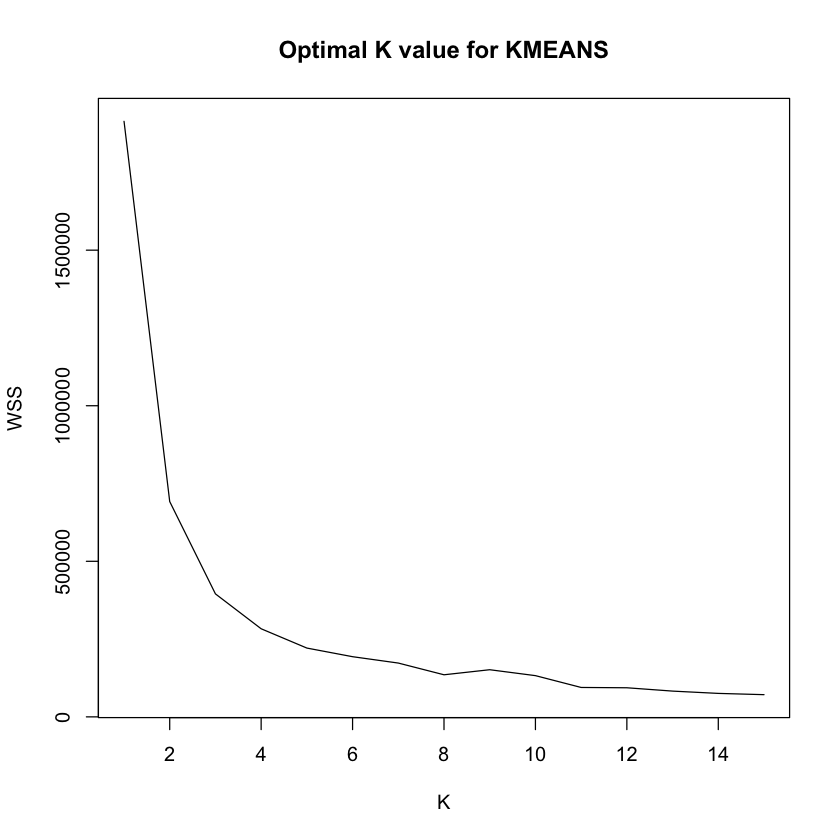

In [29]:
#wine.pr$quality <- as.numeric(wine.pr$quality)

num <- 15
nst <- 6 #Initial number of centroids

res_fin <- matrix(0, num, 1) 

for (k in 1:num) {
  
    kmd <- kmeans(wine.pr, k, nstart = nst)
    kvl <- kmd$tot.withinss
    res_fin[k] <- kvl
}

plot(res_fin, type = 'l', ylab = 'WSS', xlab = 'K',
     main = 'Optimal K value for KMEANS')


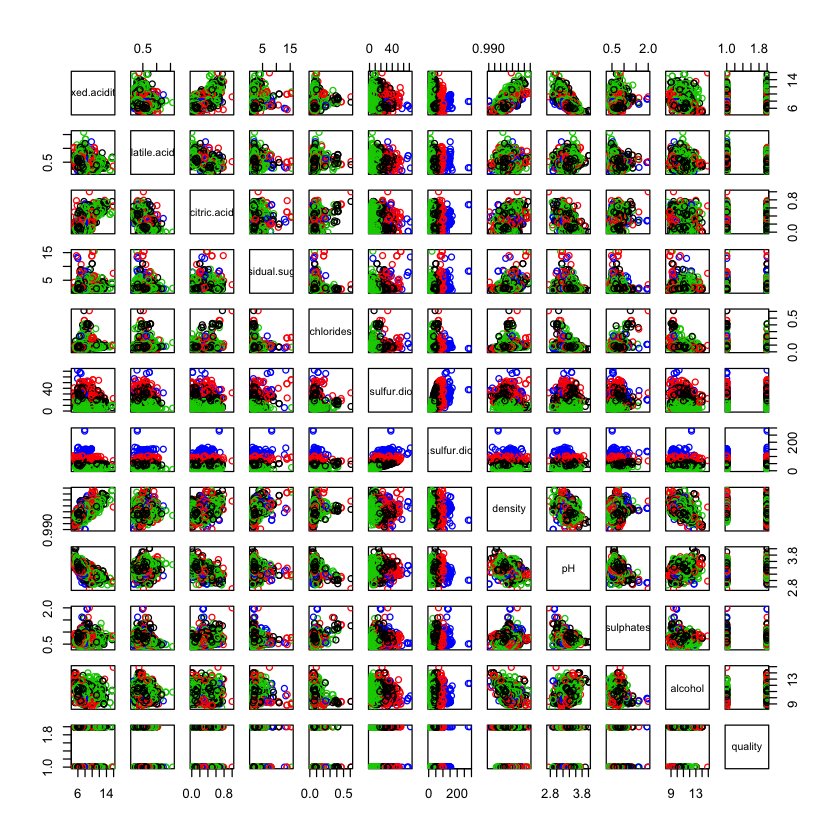

In [30]:
# WSS Method
set.seed(7406)

kbest <- 4 # The best K Value
fitK = kmeans(wine.pr, kbest, nstart = 5)
plot(wine,col = fitK$cluster)



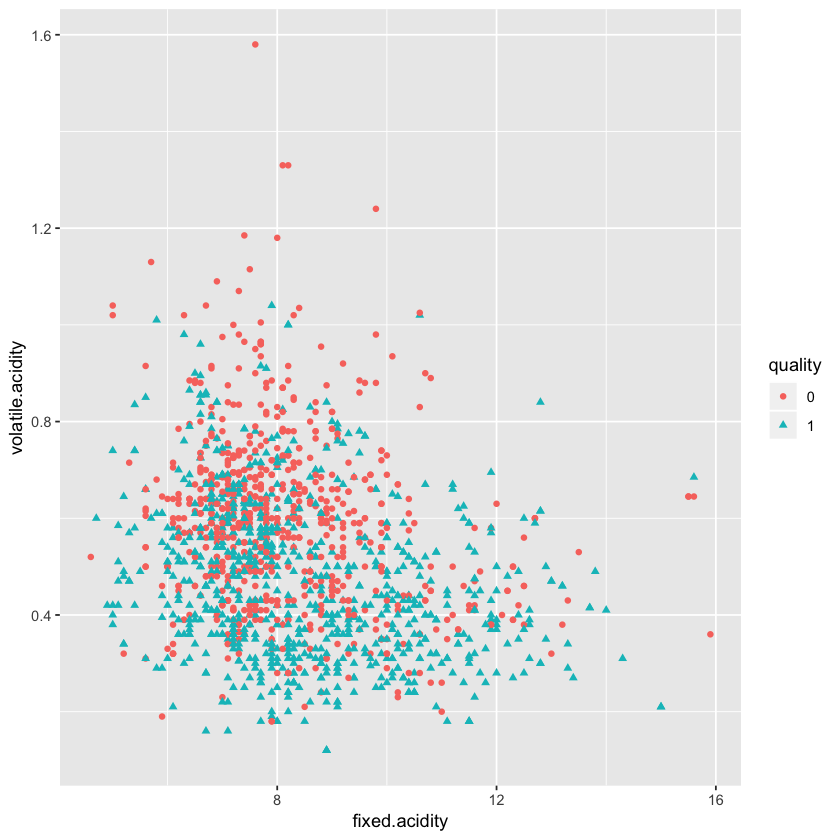

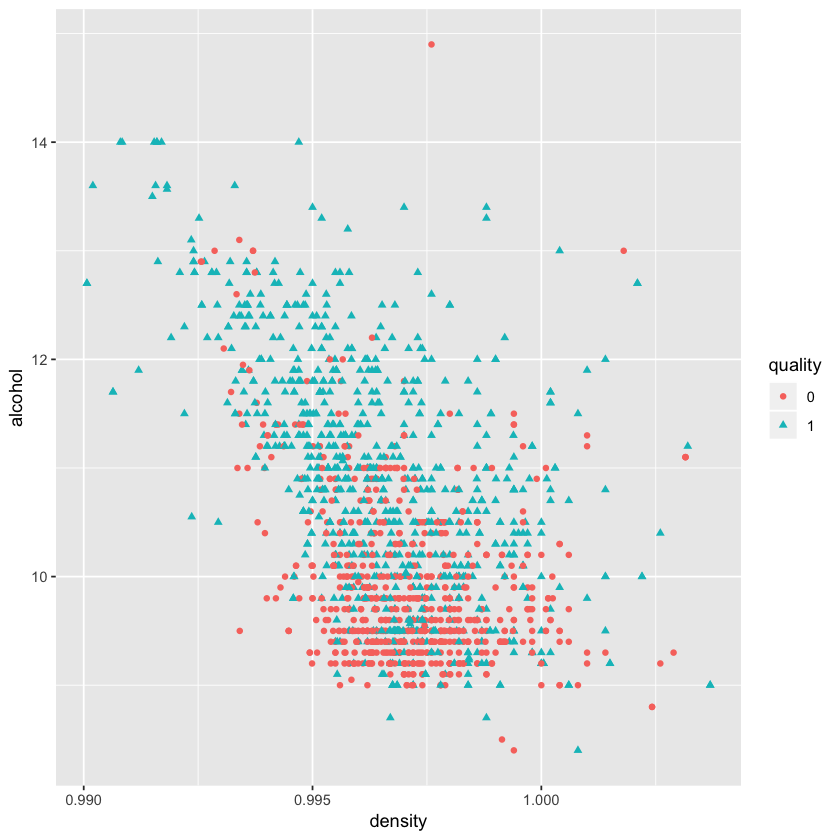

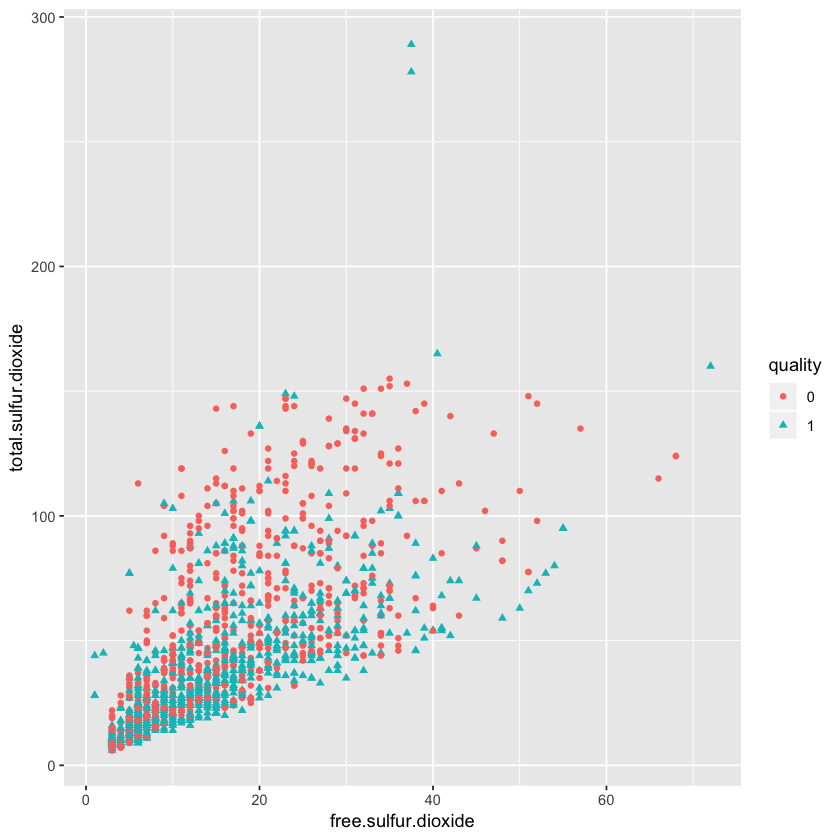

In [31]:
ggplot(wine, aes(x = fixed.acidity, y = volatile.acidity, shape = quality, col = quality))+geom_point()
ggplot(wine, aes(x = density, y = alcohol, shape = quality, col = quality))+geom_point()
ggplot(wine, aes(x = free.sulfur.dioxide, y = total.sulfur.dioxide, shape = quality, col = quality))+geom_point()


In [32]:
fitK

K-means clustering with 4 clusters of sizes 516, 265, 716, 102

Cluster means:
  fixed.acidity volatile.acidity citric.acid residual.sugar  chlorides
1      8.194380        0.5267829   0.2521512       2.400969 0.09007558
2      8.070943        0.5495283   0.2777358       2.906226 0.09103396
3      8.543715        0.5174511   0.2751536       2.387221 0.08396369
4      8.026471        0.5494608   0.3193137       3.345588 0.08958824
  free.sulfur.dioxide total.sulfur.dioxide   density       pH sulphates
1           19.045543             47.25775 0.9967347 3.330581 0.6727519
2           24.739623             82.77358 0.9970061 3.322792 0.6445283
3            8.311453             20.55028 0.9966164 3.304483 0.6482682
4           29.897059            130.07843 0.9970477 3.228824 0.6890196
    alcohol
1 10.412274
2 10.153019
3 10.611266
4  9.856863

Clustering vector:
   [1] 3 2 1 1 3 1 1 3 3 2 1 2 1 3 4 4 2 1 3 1 1 2 1 1 1 3 3 1 1 3 2 1 4 2 1 3 3
  [38] 3 3 2 2 1 3 3 3 1 4 1 3 2 3 3 3 4 2 1 

Warning message:
“package ‘factoextra’ was built under R version 3.6.3”Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


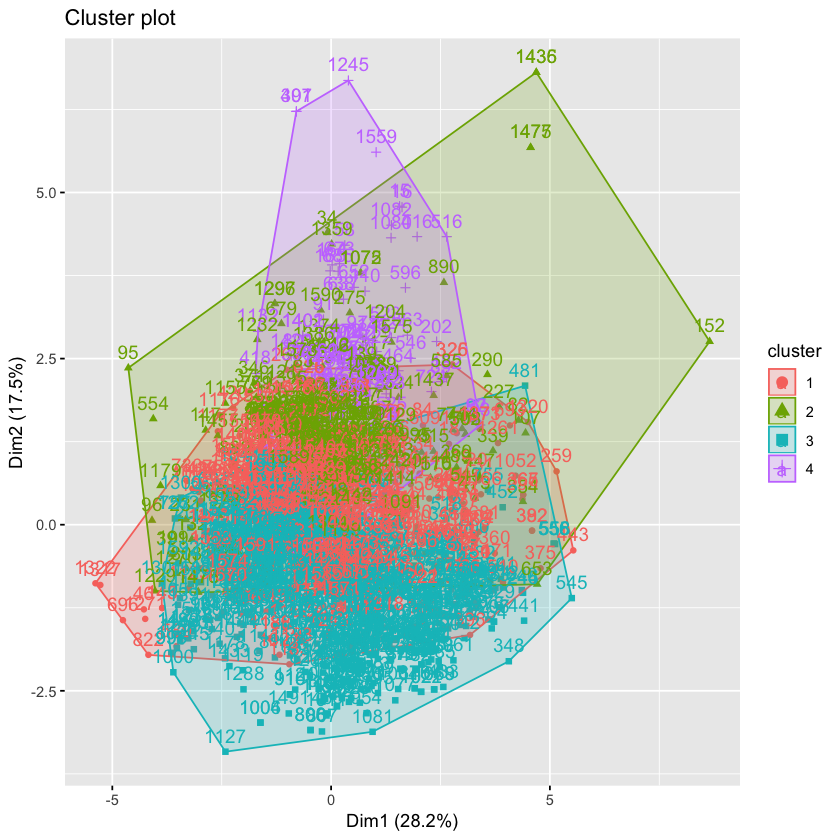

In [33]:
library(factoextra)
fviz_cluster(fitK, data = wine.pr)

# KNN

In [34]:
#Random sampling
set.seed(7406)

test <- 0.8

ff <- floor((1 - test)*nrow(wine))

ind <- sample(nrow(wine), ff, replace = FALSE)

# Training and Test datasets
wine_train <- wine[ind,]
wine_test <- wine[-ind,]

1 = 71.09375 
2 = 65.07812 
3 = 67.89062 
4 = 65.39062 
5 = 67.26562 
6 = 65.70312 
7 = 65.54688 
8 = 66.79688 
9 = 67.10938 
10 = 65.07812 
11 = 66.25 
12 = 66.17188 
13 = 66.01562 
14 = 65.39062 
15 = 65.39062 
16 = 65 
17 = 64.92188 
18 = 65.3125 
19 = 65.15625 
20 = 64.84375 
21 = 63.82812 
22 = 64.84375 
23 = 63.28125 
24 = 63.125 
25 = 62.89062 
26 = 62.73438 
27 = 62.34375 
28 = 62.5 


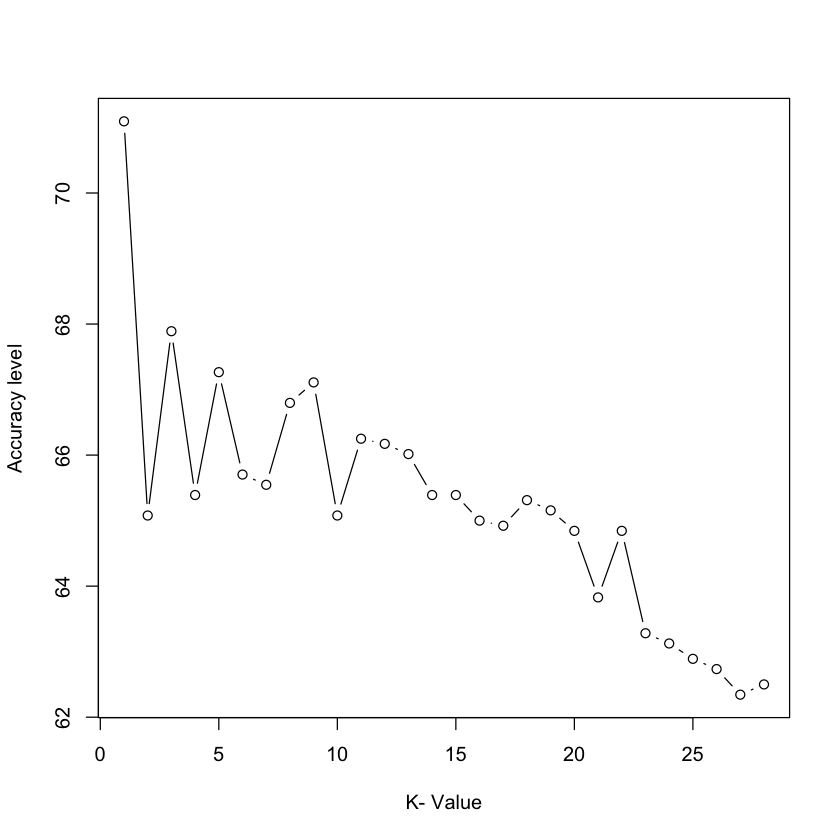

In [35]:
i=1
k.optm=1
for (i in 1:28){
    knn.mod <- knn(train=wine_train, test=wine_test, cl=wine_train$quality, k=i)
    k.optm[i] <- 100 * sum(wine_test$quality == knn.mod)/NROW(wine_test$quality)
    k=i
    cat(k,'=',k.optm[i],'
')}
plot(k.optm, type="b", xlab="K- Value",ylab="Accuracy level")

In [36]:
knn <- knn(train=wine_train, test=wine_test, cl=wine_train$quality, k=3)

In [37]:
cm <- confusionMatrix(wine_test$quality, as.factor(knn))
print(cm)

print(paste('Accuracy = ', round(cm$overall['Accuracy'],3) ))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 375 235
         1 174 496
                                         
               Accuracy : 0.6805         
                 95% CI : (0.6541, 0.706)
    No Information Rate : 0.5711         
    P-Value [Acc > NIR] : 6.402e-16      
                                         
                  Kappa : 0.3566         
                                         
 Mcnemar's Test P-Value : 0.003009       
                                         
            Sensitivity : 0.6831         
            Specificity : 0.6785         
         Pos Pred Value : 0.6148         
         Neg Pred Value : 0.7403         
             Prevalence : 0.4289         
         Detection Rate : 0.2930         
   Detection Prevalence : 0.4766         
      Balanced Accuracy : 0.6808         
                                         
       'Positive' Class : 0              
                                         
[1] "Acc

# SVM

In [38]:
classifier = svm(formula = quality ~ .,
                 data = wine,
                 type = 'C-classification',
                 kernel = 'linear')
summary(classifier)


Call:
svm(formula = quality ~ ., data = wine, type = "C-classification", 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.09090909 

Number of Support Vectors:  946

 ( 474 472 )


Number of Classes:  2 

Levels: 
 0 1




In [39]:
predictions <- predict(classifier, newdata = wine[,1:11])
cm <- confusionMatrix(wine$quality, as.factor(predictions))
print(cm)
print(paste('Accuracy = ', round(cm$overall['Accuracy'],3) ))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 577 167
         1 234 621
                                          
               Accuracy : 0.7492          
                 95% CI : (0.7272, 0.7703)
    No Information Rate : 0.5072          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4989          
                                          
 Mcnemar's Test P-Value : 0.0009811       
                                          
            Sensitivity : 0.7115          
            Specificity : 0.7881          
         Pos Pred Value : 0.7755          
         Neg Pred Value : 0.7263          
             Prevalence : 0.5072          
         Detection Rate : 0.3609          
   Detection Prevalence : 0.4653          
      Balanced Accuracy : 0.7498          
                                          
       'Positive' Class : 0               
                              

# Ordinal Regression

In [40]:
ord_mod <- polr(as.factor(quality) ~., data = wine.pr, Hess = TRUE)
summary(ord_mod)


Call:
polr(formula = as.factor(quality) ~ ., data = wine.pr, Hess = TRUE)

Coefficients:
                         Value Std. Error t value
fixed.acidity          0.10240   0.051209   2.000
volatile.acidity      -3.41794   0.400103  -8.543
citric.acid           -0.80494   0.462371  -1.741
residual.sugar         0.07617   0.038210   1.993
chlorides             -5.17121   1.354373  -3.818
free.sulfur.dioxide    0.01392   0.006767   2.057
total.sulfur.dioxide  -0.01119   0.002360  -4.744
density              -48.92546   0.974488 -50.206
pH                    -0.98472   0.496900  -1.982
sulphates              2.86724   0.358016   8.009
alcohol                0.85611   0.059355  14.424

Intercepts:
    Value    Std. Error t value 
3|4 -48.8787   0.9979   -48.9797
4|5 -46.9597   0.9959   -47.1541
5|6 -43.2452   0.9988   -43.2968
6|7 -40.3898   1.0111   -39.9454
7|8 -37.3837   1.0409   -35.9138

Residual Deviance: 3074.928 
AIC: 3106.928 

In [41]:
(ctable <- coef(summary(ord_mod)))

,Value,Std. Error,t value
fixed.acidity,0.10239667,0.051208703,1.999595
volatile.acidity,-3.41794232,0.400103057,-8.542655
citric.acid,-0.80493954,0.462371339,-1.740894
residual.sugar,0.07616957,0.038209940,1.993449
chlorides,-5.17121245,1.354373478,-3.818158
free.sulfur.dioxide,0.01392022,0.006767187,2.057016
total.sulfur.dioxide,-0.01119452,0.002359517,-4.744413
density,-48.92545743,0.974488188,-50.206311
pH,-0.98471618,0.496900166,-1.981718
sulphates,2.86723651,0.358015972,8.008683


In [42]:
## calculate and store p values
p <- pnorm(abs(ctable[, "t value"]), lower.tail = FALSE) * 2

## combined table
(ctable <- cbind(ctable, "p value" = p))

,Value,Std. Error,t value,p value
fixed.acidity,0.10239667,0.051208703,1.999595,4.554400e-02
volatile.acidity,-3.41794232,0.400103057,-8.542655,1.311728e-17
citric.acid,-0.80493954,0.462371339,-1.740894,8.170214e-02
residual.sugar,0.07616957,0.038209940,1.993449,4.621229e-02
chlorides,-5.17121245,1.354373478,-3.818158,1.344516e-04
free.sulfur.dioxide,0.01392022,0.006767187,2.057016,3.968465e-02
total.sulfur.dioxide,-0.01119452,0.002359517,-4.744413,2.091120e-06
density,-48.92545743,0.974488188,-50.206311,0.000000e+00
pH,-0.98471618,0.496900166,-1.981718,4.751077e-02
sulphates,2.86723651,0.358015972,8.008683,1.159431e-15


In [43]:
#(ci <- confint(ord_mod)) # default method gives profiled CIs

In [44]:
confint.default(ord_mod) # CIs assuming normality

# If the move from 2.5% to 97.% includes a zero (a sign change) then this coefficient is NOT statistically significant

,2.5 %,97.5 %
fixed.acidity,2.029459e-03,0.202763888
volatile.acidity,-4.202130e+00,-2.633754738
citric.acid,-1.711171e+00,0.101291629
residual.sugar,1.279467e-03,0.151059678
chlorides,-7.825736e+00,-2.516689216
free.sulfur.dioxide,6.567716e-04,0.027183659
total.sulfur.dioxide,-1.581909e-02,-0.006569955
density,-5.083542e+01,-47.015495682
pH,-1.958623e+00,-0.010809751
sulphates,2.165538e+00,3.568934919


In [45]:
## odds ratios - These coefficients are called proportional odds ratios
#exp(cbind(OR = coef(ord_mod), ci))

In [46]:
# Let's rerun the regression with only significant predictors

ord_mods <- polr(as.factor(quality) ~. -citric.acid - chlorides - total.sulfur.dioxide, data = wine.pr, Hess = TRUE)
summary(ord_mods)


Call:
polr(formula = as.factor(quality) ~ . - citric.acid - chlorides - 
    total.sulfur.dioxide, data = wine.pr, Hess = TRUE)

Coefficients:
                         Value Std. Error   t value
fixed.acidity        1.752e-01   0.041692    4.2028
volatile.acidity    -3.327e+00   0.328848  -10.1181
residual.sugar       6.303e-02   0.037483    1.6815
free.sulfur.dioxide -6.991e-03   0.005019   -1.3928
density             -1.152e+02   0.903329 -127.5106
pH                   3.712e-01   0.467642    0.7938
sulphates            2.211e+00   0.320661    6.8959
alcohol              8.518e-01   0.056740   15.0119

Intercepts:
    Value     Std. Error t value  
3|4 -109.3326    0.9234  -118.3963
4|5 -107.4155    0.9213  -116.5960
5|6 -103.7981    0.9299  -111.6220
6|7 -100.9923    0.9475  -106.5840
7|8  -97.9929    0.9813   -99.8622

Residual Deviance: 3124.447 
AIC: 3150.447 

In [47]:
(ctable1 <- coef(summary(ord_mods)))

,Value,Std. Error,t value
fixed.acidity,1.752236e-01,0.041691805,4.2028312
volatile.acidity,-3.327311e+00,0.328848094,-10.1180802
residual.sugar,6.302704e-02,0.037482996,1.6814835
free.sulfur.dioxide,-6.990924e-03,0.005019406,-1.3927792
density,-1.151840e+02,0.903329185,-127.5105984
pH,3.712250e-01,0.467641628,0.7938236
sulphates,2.211228e+00,0.320660575,6.8958536
alcohol,8.517839e-01,0.056740451,15.0119342
3|4,-1.093326e+02,0.923445965,-118.3963416
4|5,-1.074155e+02,0.921261731,-116.5960243


In [48]:
## calculate and store p values
p <- pnorm(abs(ctable1[, "t value"]), lower.tail = FALSE) * 2

## combined table
(ctable1 <- cbind(ctable1, "p value" = p))

,Value,Std. Error,t value,p value
fixed.acidity,1.752236e-01,0.041691805,4.2028312,2.635972e-05
volatile.acidity,-3.327311e+00,0.328848094,-10.1180802,4.593368e-24
residual.sugar,6.302704e-02,0.037482996,1.6814835,9.266903e-02
free.sulfur.dioxide,-6.990924e-03,0.005019406,-1.3927792,1.636866e-01
density,-1.151840e+02,0.903329185,-127.5105984,0.000000e+00
pH,3.712250e-01,0.467641628,0.7938236,4.272981e-01
sulphates,2.211228e+00,0.320660575,6.8958536,5.354233e-12
alcohol,8.517839e-01,0.056740451,15.0119342,6.133275e-51
3|4,-1.093326e+02,0.923445965,-118.3963416,0.000000e+00
4|5,-1.074155e+02,0.921261731,-116.5960243,0.000000e+00


In [49]:
#(ci1 <- confint(ord_mods)) # default method gives profiled CIs

In [50]:
ci1 <- confint.default(ord_mods) # CIs assuming normality
ci1

# All predictors are significant

,2.5 %,97.5 %
fixed.acidity,0.09350918,2.569381e-01
volatile.acidity,-3.97184180,-2.682781e+00
residual.sugar,-0.01043828,1.364924e-01
free.sulfur.dioxide,-0.01682878,2.846931e-03
density,-116.95453760,-1.134136e+02
pH,-0.54533578,1.287786e+00
sulphates,1.58274519,2.839712e+00
alcohol,0.74057467,9.629932e-01


In [51]:
## odds ratios - These coefficients are called proportional odds ratios
exp(cbind(OR = coef(ord_mods), ci1))

,OR,2.5 %,97.5 %
fixed.acidity,1.191513e+00,1.098021e+00,1.292965e+00
volatile.acidity,3.588947e-02,1.883870e-02,6.837275e-02
residual.sugar,1.065056e+00,9.896160e-01,1.146246e+00
free.sulfur.dioxide,9.930335e-01,9.833120e-01,1.002851e+00
density,9.466837e-51,1.611720e-51,5.560580e-50
pH,1.449509e+00,5.796471e-01,3.624751e+00
sulphates,9.126921e+00,4.868302e+00,1.711083e+01
alcohol,2.343824e+00,2.097140e+00,2.619525e+00


In [52]:
# Proportional Odds

sf <- function(y) {
  c('Y>=0' = qlogis(mean(y >= 0)),
    'Y>=1' = qlogis(mean(y >= 1)),
    'Y>=2' = qlogis(mean(y >= 2)),
    'Y>=3' = qlogis(mean(y >= 3)),
    'Y>=4' = qlogis(mean(y >= 4)),
    'Y>=6' = qlogis(mean(y >= 6)),
    'Y>=7' = qlogis(mean(y >= 7)),
    'Y>=8' = qlogis(mean(y >= 8)),
    'Y>=9' = qlogis(mean(y >= 9)))
}

(s <- with(wine, summary(as.numeric(quality) ~ fixed.acidity + volatile.acidity + residual.sugar + 
                           free.sulfur.dioxide + density + pH + sulphates + alcohol, fun=sf)))

as.numeric(quality)     N= 1599 

+-------------------+-------------+----+----+----+------------+----+----+----+----+----+----+
|                   |             |N   |Y>=0|Y>=1|Y>=2        |Y>=3|Y>=4|Y>=6|Y>=7|Y>=8|Y>=9|
+-------------------+-------------+----+----+----+------------+----+----+----+----+----+----+
|fixed.acidity      |[4.6, 7.2)   | 419|Inf |Inf | 0.109895671|-Inf|-Inf|-Inf|-Inf|-Inf|-Inf|
|                   |[7.2, 8.0)   | 397|Inf |Inf |-0.136230450|-Inf|-Inf|-Inf|-Inf|-Inf|-Inf|
|                   |[8.0, 9.3)   | 387|Inf |Inf | 0.036179657|-Inf|-Inf|-Inf|-Inf|-Inf|-Inf|
|                   |[9.3,15.9]   | 396|Inf |Inf | 0.559615788|-Inf|-Inf|-Inf|-Inf|-Inf|-Inf|
+-------------------+-------------+----+----+----+------------+----+----+----+----+----+----+
|volatile.acidity   |[0.120,0.395)| 406|Inf |Inf | 1.158630298|-Inf|-Inf|-Inf|-Inf|-Inf|-Inf|
|                   |[0.395,0.530)| 410|Inf |Inf | 0.304776506|-Inf|-Inf|-Inf|-Inf|-Inf|-Inf|
|                   |[0.53

In [53]:
# Example

glm(I(as.numeric(quality) >= 4) ~ density, family ="binomial", data = wine)

Warning message:
“glm.fit: algorithm did not converge”


Call:  glm(formula = I(as.numeric(quality) >= 4) ~ density, family = "binomial", 
    data = wine)

Coefficients:
(Intercept)      density  
 -2.657e+01   -1.089e-12  

Degrees of Freedom: 1598 Total (i.e. Null);  1597 Residual
Null Deviance:	    0 
Residual Deviance: 9.277e-09 	AIC: 4

In [54]:
#s[, 4] <- s[, 4] - s[, 3]
#s[, 3] <- s[, 3] - s[, 3]
#s

In [55]:
glm(I(as.numeric(quality) >= 6) ~ density, family ="binomial", data = wine)

Warning message:
“glm.fit: algorithm did not converge”


Call:  glm(formula = I(as.numeric(quality) >= 6) ~ density, family = "binomial", 
    data = wine)

Coefficients:
(Intercept)      density  
 -2.657e+01   -1.089e-12  

Degrees of Freedom: 1598 Total (i.e. Null);  1597 Residual
Null Deviance:	    0 
Residual Deviance: 9.277e-09 	AIC: 4

# Random Forest

In [56]:
rf <- randomForest(quality~., data=wine, proximity=TRUE) 
predictions <- predict(rf, wine)
confusionMatrix(predictions, wine$quality)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 744   0
         1   0 855
                                     
               Accuracy : 1          
                 95% CI : (0.9977, 1)
    No Information Rate : 0.5347     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.4653     
         Detection Rate : 0.4653     
   Detection Prevalence : 0.4653     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

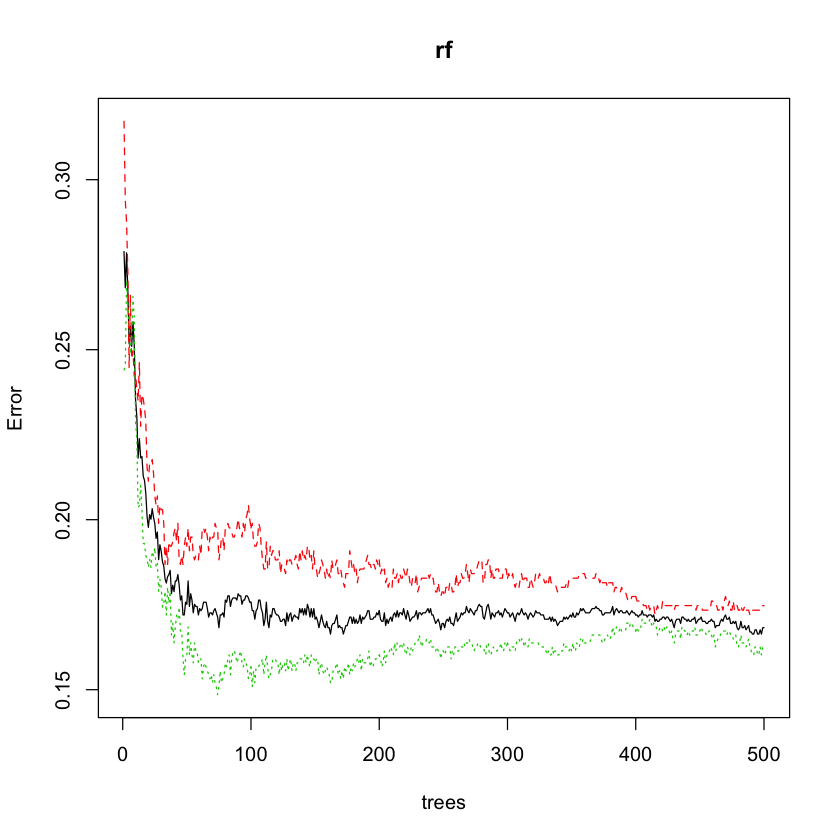

In [57]:
plot(rf)

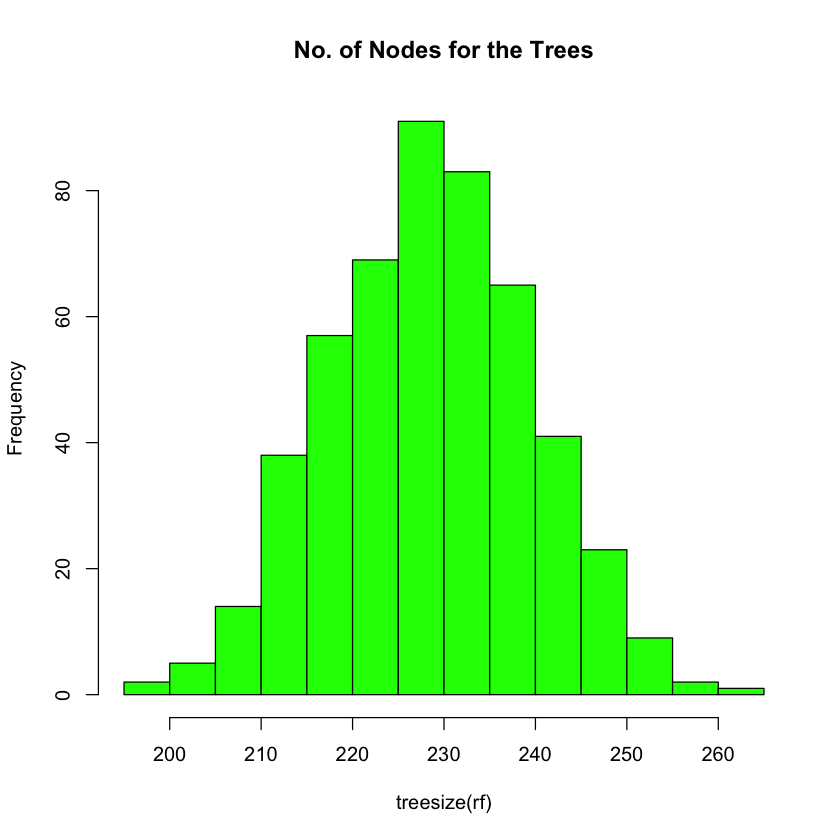

In [58]:
hist(treesize(rf),
     main = "No. of Nodes for the Trees",
     col = "green")


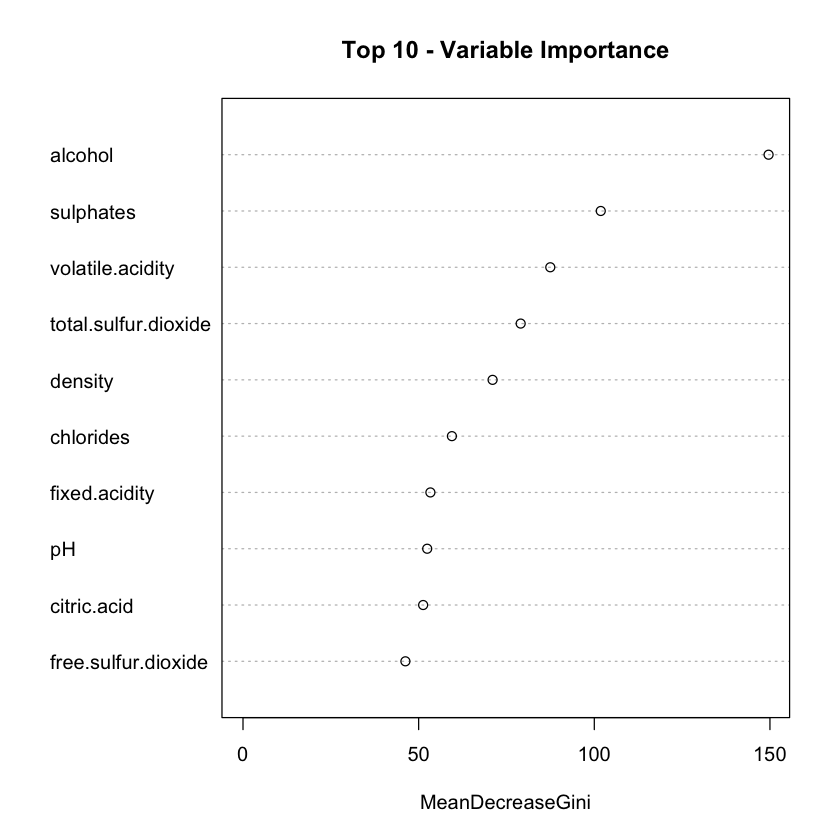

In [59]:
varImpPlot(rf,
           sort = T,
           n.var = 10,
           main = "Top 10 - Variable Importance")

In [60]:
importance(rf)

,MeanDecreaseGini
fixed.acidity,53.34507
volatile.acidity,87.47057
citric.acid,51.27754
residual.sugar,43.62082
chlorides,59.46565
free.sulfur.dioxide,46.22908
total.sulfur.dioxide,79.03872
density,71.04613
pH,52.43053
sulphates,101.83700


# Decision Tree

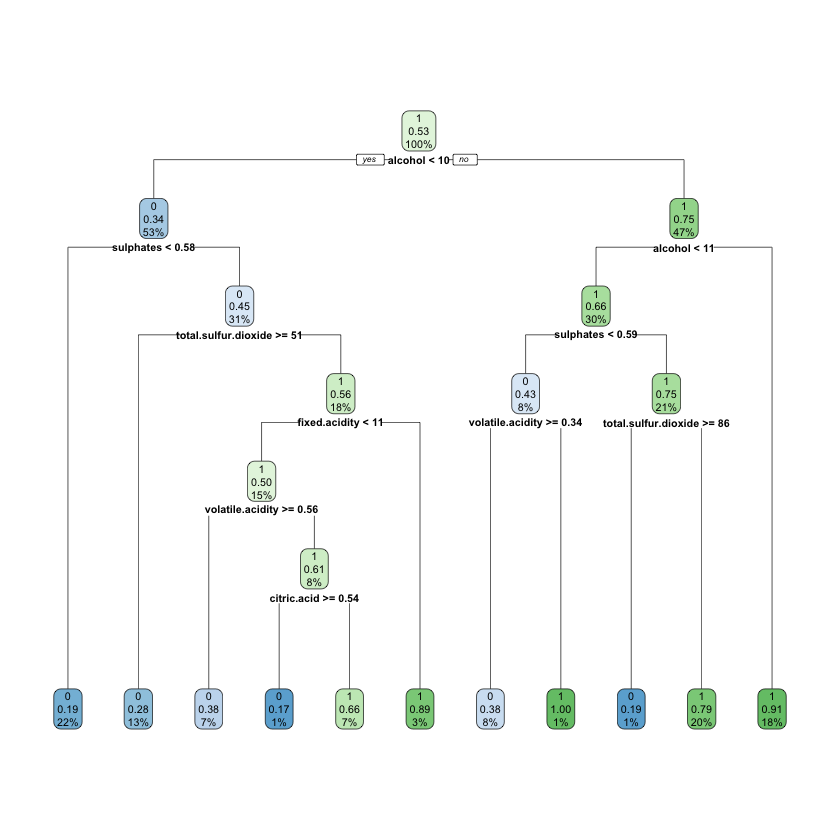

In [61]:
fit <- rpart(quality~., data = wine, method = 'class')
rpart.plot(fit, extra = 106)

In [62]:
predictions <- predict(fit, wine, type = 'class')
cm <- confusionMatrix(wine$quality, as.factor(predictions))
print(cm)
print(paste('Accuracy = ', round(cm$overall['Accuracy'],3) ))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 604 140
         1 222 633
                                          
               Accuracy : 0.7736          
                 95% CI : (0.7523, 0.7939)
    No Information Rate : 0.5166          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5483          
                                          
 Mcnemar's Test P-Value : 2.069e-05       
                                          
            Sensitivity : 0.7312          
            Specificity : 0.8189          
         Pos Pred Value : 0.8118          
         Neg Pred Value : 0.7404          
             Prevalence : 0.5166          
         Detection Rate : 0.3777          
   Detection Prevalence : 0.4653          
      Balanced Accuracy : 0.7751          
                                          
       'Positive' Class : 0               
                              

# Implementation of Monte Carlos CV for: Logistic Regression, KNN, SVM, Ordinal Regression, Random Forest, Decision Tree

In [63]:
n = dim(wine)[1]; 
n1 = round(n/10);
B= 100;

b_index <- list()
te1 <- list()
te2 <- list()
te3 <- list()
te4 <- list()
te5 <- list()
te6 <- list()
te7 <- list()



for (b in 1:B){
### randomly select n1 observations as a new training  subset in each loop
    flag <- sort(sample(1:n, n1));
    wine_train_temp <- wine[-flag,];  ## temp training set for CV
    wine_test_temp  <- wine[flag,]; ## temp testing set for CV
    
    b_index <- c(b_index, b)
     
    # Model 1: Logistic Regression with All Predictors
    lgall <- glm(quality ~ ., data = wine_train_temp, family = binomial(link="logit"))
    prediction <- predict(lgall,wine_test_temp[,1:11], type = "response")
    prediction <- ifelse(prediction>= .5, 1,0)
    cm <- confusionMatrix(wine_test_temp$quality, as.factor(prediction))
    te1 <- c(te1,round(cm$overall[['Accuracy']],3))
    
    # Model 2: Logistic Regression with Significant Predictors
    lgselect <- glm(quality ~ .- residual.sugar - fixed.acidity, data = wine, family = binomial(link="logit"))
    prediction <- predict(lgselect,wine_test_temp[,1:11], type = "response")
    prediction <- ifelse(prediction>= .5, 1,0)
    cm <- confusionMatrix(wine_test_temp$quality, as.factor(prediction))
    te2 <- c(te2,round(cm$overall[['Accuracy']],3))
    
    # Model 3: Knn at k = 3
    knn <- knn(train=wine_train_temp, test=wine_test_temp, cl=wine_train_temp$quality, k=3)
    cm <- confusionMatrix(wine_test_temp$quality, as.factor(knn))
    te3 <- c(te3,round(cm$overall[['Accuracy']],3))
    
    # Model 4: SVM
    classifier = svm(formula = quality ~ .,data = wine_train_temp,type = 'C-classification', kernel = 'linear')
    predictions <- predict(classifier, newdata = wine_test_temp[,1:11])
    cm <- confusionMatrix(wine_test_temp$quality, as.factor(predictions))
    te4 <- c(te4,round(cm$overall[['Accuracy']],3))

    # Model 5: Random Forest
    rf <- randomForest(quality~., data=wine_train_temp, proximity=TRUE) 
    predictions <- predict(rf, wine_test_temp)
    cm <- confusionMatrix(predictions, wine_test_temp$quality)
    te5 <- c(te5,round(cm$overall[['Accuracy']],3))
    
    # Model 6: Decision Tree
    fit <- rpart(quality~., data = wine_train_temp, method = 'class')
    predictions <- predict(fit, wine_test_temp, type = 'class')
    cm <- confusionMatrix(wine_test_temp$quality, as.factor(predictions))
    te6 <- c(te6,round(cm$overall[['Accuracy']],3))

    

}

In [66]:
TEALL <- data.frame(unlist(te1), unlist(te2), unlist(te3), unlist(te4), unlist(te5), unlist(te6))

colnames(TEALL) <- c("LogReg", "LogRegSelect", "Knn", "Svm", "RF", "DTree")

results_viz = data.frame(unlist(apply(TEALL, 2, mean)))
results_viz



,unlist.apply.TEALL..2..mean..
LogReg,0.74524
LogRegSelect,0.74752
Knn,0.75799
Svm,0.74092
RF,0.82563
DTree,0.72607


In [65]:
dim(wine_test_temp)[1]/dim(wine_train_temp)[1]

[1] 0.1111883